In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
symbol = 'ETH-USD'
#symbol = 'AAPL'

In [3]:
data = yf.download(symbol, start='2018-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
data['Tommorow'] = data["Close"].shift(-1)

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume,Tommorow
Date,,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128,884.443970
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760,962.719971
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936,980.921997
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776,997.719971
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824,1041.680054
...,...,...,...,...,...,...,...
2024-01-13,2522.933838,2589.079834,2498.594482,2576.597900,2576.597900,12250316867,2472.241211
2024-01-14,2578.003662,2578.332275,2470.424316,2472.241211,2472.241211,9405587417,2511.363770
2024-01-15,2471.666992,2550.769043,2470.820801,2511.363770,2511.363770,9700630000,2587.691162


In [6]:
data["up/down"] = (data['Tommorow'] > data['Close']).astype(int)

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume,Tommorow,up/down
Date,,,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128,884.443970,1
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760,962.719971,1
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936,980.921997,1
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776,997.719971,1
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824,1041.680054,1
...,...,...,...,...,...,...,...,...
2024-01-13,2522.933838,2589.079834,2498.594482,2576.597900,2576.597900,12250316867,2472.241211,0
2024-01-14,2578.003662,2578.332275,2470.424316,2472.241211,2472.241211,9405587417,2511.363770,1
2024-01-15,2471.666992,2550.769043,2470.820801,2511.363770,2511.363770,9700630000,2587.691162,1


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [9]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)

train = data.iloc[:-365]
test = data.iloc[-365:]


predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["up/down"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [10]:
from sklearn.metrics import precision_score, accuracy_score

In [11]:
preds = model.predict(test[predictors])

In [12]:
preds = pd.Series(preds, index=test.index)

In [13]:
preds

Date
2023-01-18    0
2023-01-19    1
2023-01-20    0
2023-01-21    0
2023-01-22    0
             ..
2024-01-13    1
2024-01-14    1
2024-01-15    1
2024-01-16    1
2024-01-17    1
Length: 365, dtype: int32

In [14]:
precision_score(test["up/down"], preds)

0.5357142857142857

In [15]:
accuracy_score(test["up/down"], preds)

0.5232876712328767

In [16]:
combined = pd.concat((test["up/down"], preds), axis=1)

<AxesSubplot:xlabel='Date'>

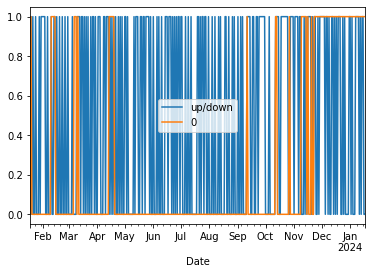

In [17]:
combined.plot()

In [18]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test["up/down"], preds)
print(conf_mat)

[[146  39]
 [135  45]]


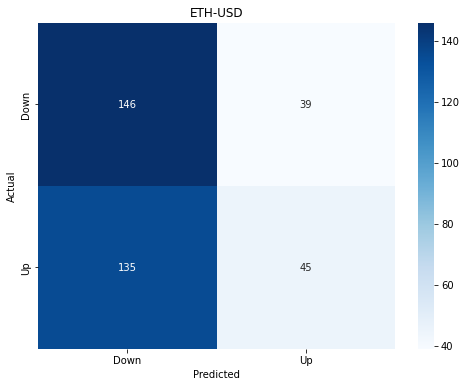

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Down", "Up"],
            yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(symbol)
plt.show()

In [20]:
import statsmodels.api as sm

In [21]:
def clean_data(symbol, start, year,  end=None):
    data = yf.download(symbol, start, end)
    df = data['Adj Close'].pct_change() * 100
    df = df.rename('Today')
    df = df.reset_index()
    for i in range(1, 6):
        df['Lag '+str(i)] = df['Today'].shift(i)
    df['Volume'] = data.Volume.shift(1).values/1000_000_000
    df = df.dropna()
    df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]
    df = sm.add_constant(df)
    X = df[['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y = df.Direction
    model = RandomForestClassifier()
    result = model.fit()
    print(result.summary())
    prediction = result.predict(X)
    a = confusion_matrix(y, prediction)
    plt.figure(figsize=(8, 6))
    sns.heatmap(a, annot=True, fmt="d", cmap="Blues", cbar=True)
    plt.title("Confusion Matrix")
    plt.show()
    print(a)
    print((a.iloc[1, 1] + a.iloc[0, 0])/len(df))

    x_train = df[df.Date.dt.year < year][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_train = df[df.Date.dt.year < year]['Direction']
    x_test = df[df.Date.dt.year == year][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_test = df[df.Date.dt.year == year]['Direction']
    model = sm.Logit(y_train, x_train)
    result = model.fit()
    prediction = result.predict(x_test)
    b = confusion_matrix(y_test, prediction)
    print(b)
    print((b.iloc[1, 1] + b.iloc[0, 0])/len(x_test))


    x_train = df[df.Date.dt.year < year][['const', 'Lag 1', 'Lag 2']]
    y_train = df[df.Date.dt.year < year]['Direction']
    x_test = df[df.Date.dt.year == year][['const', 'Lag 1', 'Lag 2']]
    y_test = df[df.Date.dt.year == year]['Direction']
    model = sm.Logit(y_train, x_train)
    result = model.fit()
    prediction = result.predict(x_test)
    b = confusion_matrix(y_test, prediction)
    print(b)
    print((b.iloc[1, 1] + b.iloc[0, 0])/len(x_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(b, annot=True, fmt="d", cmap="Reds", cbar=True)
    plt.title("Confusion Matrix")
    plt.title(symbol)
    plt.show()
    print(b)
    print((a.iloc[1, 1] + a.iloc[0, 0])/len(df))

In [22]:
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

def RF(symbol, start, year, end=None):
    # Pobranie i przetworzenie danych
    data = yf.download(symbol, start, end)
    df = data['Adj Close'].pct_change() * 100
    df = df.rename('Today')
    df = df.reset_index()
    for i in range(1, 6):
        df['Lag ' + str(i)] = df['Today'].shift(i)
    df['Volume'] = data.Volume.shift(1).values / 1000_000_000
    df = df.dropna()
    df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]

    # Przygotowanie danych do modelu
    X = df[['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y = df['Direction']

    # Podział danych na zestawy treningowe i testowe
    x_train = df[df.Date.dt.year < year][['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_train = df[df.Date.dt.year < year]['Direction']
    x_test = df[df.Date.dt.year == year][['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_test = df[df.Date.dt.year == year]['Direction']

    # Trenowanie modelu RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(x_train, y_train)

    # Predykcja i ocena modelu
    prediction = model.predict(x_test)
    b = confusion_matrix(y_test, prediction)
    print(b)
    print((b[1, 1] + b[0, 0]) / len(x_test))
    
    # Wyświetlanie macierzy pomyłek
    plt.figure(figsize=(8, 6))
    sns.heatmap(b, annot=True, fmt="d", cmap="Greens", cbar=True)
    plt.title("Confusion Matrix")
    plt.title(symbol)
    plt.show()
    print(b)
    print((b[1, 1] + b[0, 0]) / len(x_test))

clean_data('ETH-USD', '2018-01-01', 2023)
clean_data('AAPL', '2018-01-01', 2023)



[*********************100%%**********************]  1 of 1 completed


TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

[*********************100%%**********************]  1 of 1 completed
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Najlepsze parametry: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Dokładność modelu: 0.5287671232876713


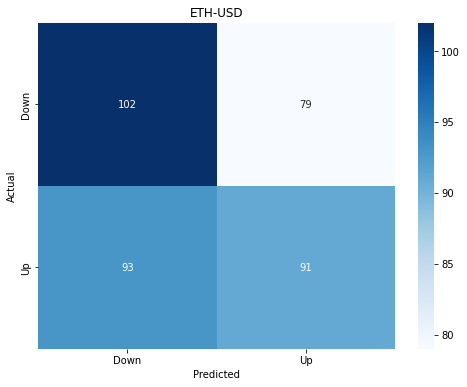

[[102  79]
 [ 93  91]]
0.5287671232876713


In [35]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

def RF(symbol, start, year, end=None):
    # Pobranie i przetworzenie danych
    data = yf.download(symbol, start, end)
    df = data['Adj Close'].pct_change() * 100
    df = df.rename('Today')
    df = df.reset_index()
    for i in range(1, 6):
        df['Lag ' + str(i)] = df['Today'].shift(i)
    df['Volume'] = data.Volume.shift(1).values / 1000_000_000
    df = df.dropna()
    df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]

    # Przygotowanie danych do modelu
    X = df[['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y = df['Direction']

    # Podział danych na zestawy treningowe i testowe
    x_train = df[df.Date.dt.year < year][['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_train = df[df.Date.dt.year < year]['Direction']
    x_test = df[df.Date.dt.year == year][['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_test = df[df.Date.dt.year == year]['Direction']

    # Parametry do przetestowania w Grid Search
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Grid Search z walidacją krzyżową
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(x_train, y_train)

    # Najlepsze parametry
    print("Najlepsze parametry:", grid_search.best_params_)

    # Ocena modelu
    best_rf = grid_search.best_estimator_
    predictions = best_rf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Dokładność modelu: {accuracy}")

    # Wyświetlanie macierzy pomyłek
    b = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(b, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Down", "Up"],
            yticklabels=["Down", "Up"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.title(symbol)
    plt.show()
    print(b)
    print((b[1, 1] + b[0, 0]) / len(x_test))

RF('ETH-USD', '2018-01-01', 2023)



In [44]:
RF('AAPL', '2017-01-01', 2023)


[*********************100%%**********************]  1 of 1 completed
Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

[*********************100%%**********************]  1 of 1 completed
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Model accuracy: 0.576
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       110
           1       0.62      0.64      0.63       140

    accuracy                           0.58       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.57      0.58      0.57       250



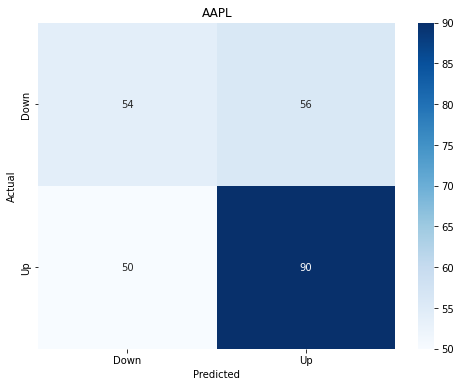

[[54 56]
 [50 90]]
0.576


In [55]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

def RF(symbol, start, year, end=None):
    # Download and preprocess data
    stock_data = yf.download(symbol, start, end)
    returns = stock_data['Adj Close'].pct_change() * 100
    returns = returns.rename('Today').reset_index()

    for i in range(1, 6):
        returns['Lag ' + str(i)] = returns['Today'].shift(i)

    returns['Volume'] = stock_data.Volume.shift(1).values / 1_000_000_000
    returns = returns.dropna()
    returns['Direction'] = [1 if i > 0 else 0 for i in returns['Today']]

    # Feature scaling
    scaler = MinMaxScaler()
    returns[['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']] = scaler.fit_transform(returns[['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']])

    # Prepare data for the model
    X = returns[['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y = returns['Direction']

    # Train-test split
    # X_train = returns[returns.Date.dt.year < year][['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    # y_train = returns[returns.Date.dt.year < year]['Direction']
    # X_test = returns[returns.Date.dt.year == year][['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    # y_test = returns[returns.Date.dt.year == year]['Direction']

    X_train = returns[returns.Date.dt.year < year][['Lag 1', 'Lag 2']]
    y_train = returns[returns.Date.dt.year < year]['Direction']
    X_test = returns[returns.Date.dt.year == year][['Lag 1', 'Lag 2']]
    y_test = returns[returns.Date.dt.year == year]['Direction']

    # Hyperparameter tuning using Grid Search
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Best parameters
    print("Best parameters:", grid_search.best_params_)

    # Model evaluation
    best_rf = grid_search.best_estimator_
    predictions = best_rf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model accuracy: {accuracy}")

    # Display classification report
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Display confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=["Down", "Up"],
                yticklabels=["Down", "Up"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(symbol)
    plt.show()

    print(cm)
    print((cm[1, 1] + cm[0, 0]) / len(X_test))

# Example usage
RF('AAPL', '2018-01-01', 2023)


[*********************100%%**********************]  1 of 1 completed
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Model accuracy: 0.5342465753424658
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.66      0.59       181
           1       0.55      0.41      0.47       184

    accuracy                           0.53       365
   macro avg       0.54      0.54      0.53       365
weighted avg       0.54      0.53      0.53       365



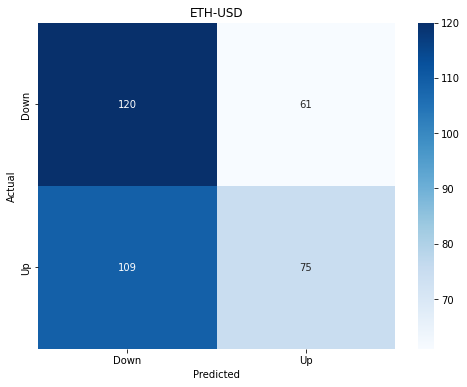

[[120  61]
 [109  75]]
0.5342465753424658


In [56]:
RF('ETH-USD', '2018-01-01', 2023)